In [2]:
#mounting drive to colab
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#importing libraries 
import numpy as np
import pandas as pd
import requests
import os
#loading data file
dress_patterns_df = pd.read_csv('/content/drive/My Drive/dress_patterns.csv')
dress_patterns = dress_patterns_df .values

# category
unique_dress_class = set(dress_patterns_df['category'])
print(unique_dress_class)

#create a folder dataset and nested folder of category
print(os.listdir())
os.mkdir('unique_dress_class')

for cat in unique_dress_class:
    print(cat)
    os.mkdir('unique_dress_class/'+cat)

print(os.listdir('unique_dress_class'))


#downloading data set using url's
# save image in respective category folder.

for i in range(0,14000):
    if i%5 == 0:
        print(i, '/', len(dress_patterns))
    pattern = dress_patterns[i]
    url = pattern[3]
    unit_id = pattern[0]
    dress_class = pattern[1]
    try:
        r = requests.get(url, allow_redirects=True)
        open('unique_dress_class/'+dress_class+'/'+str(unit_id)+'.jpg', 'wb').write(r.content)
    except:
        print('ERROR at: ', i)


{'floral', 'plain', 'OTHER', 'stripes', 'squares', 'letter_numb', 'ikat', 'chevron', 'polka dot', 'scales', 'stars', 'cartoon', 'animal', 'geometry', 'houndstooth', 'tribal', 'skull'}
['.config', 'drive', 'sample_data']
floral
plain
OTHER
stripes
squares
letter_numb
ikat
chevron
polka dot
scales
stars
cartoon
animal
geometry
houndstooth
tribal
skull
['squares', 'scales', 'polka dot', 'chevron', 'tribal', 'skull', 'stripes', 'letter_numb', 'geometry', 'plain', 'ikat', 'cartoon', 'floral', 'stars', 'animal', 'houndstooth', 'OTHER']
0 / 15702
5 / 15702
10 / 15702
15 / 15702
20 / 15702
25 / 15702
30 / 15702
35 / 15702
40 / 15702
45 / 15702
50 / 15702
55 / 15702
60 / 15702
65 / 15702
70 / 15702
75 / 15702
80 / 15702
85 / 15702
90 / 15702
95 / 15702
100 / 15702
105 / 15702
110 / 15702
115 / 15702
120 / 15702
125 / 15702
130 / 15702
135 / 15702
140 / 15702
145 / 15702
150 / 15702
155 / 15702
160 / 15702
165 / 15702
170 / 15702
175 / 15702
180 / 15702
185 / 15702
190 / 15702
195 / 15702
200 / 

In [4]:
#create a folder dataset and nested folder of category
print(os.listdir())
os.mkdir('dress_test')

for cat in unique_dress_class:
    print(cat)
    os.mkdir('dress_test/'+cat)

print(os.listdir('dress_test'))


#downloading data set using url's
# save image in respective category folder.

for i in range((len(dress_patterns)-1000),len(dress_patterns)):
    if i%5 == 0:
        print(i, '/', len(dress_patterns))
    pattern = dress_patterns[i]
    url = pattern[3]
    unit_id = pattern[0]
    dress_class = pattern[1]
    try:
        r = requests.get(url, allow_redirects=True)
        open('dress_test/'+dress_class+'/'+str(unit_id)+'.jpg', 'wb').write(r.content)
    except:
        print('ERROR at: ', i)


['.config', 'drive', 'unique_dress_class', 'sample_data']
floral
plain
OTHER
stripes
squares
letter_numb
ikat
chevron
polka dot
scales
stars
cartoon
animal
geometry
houndstooth
tribal
skull
['squares', 'scales', 'polka dot', 'chevron', 'tribal', 'skull', 'stripes', 'letter_numb', 'geometry', 'plain', 'ikat', 'cartoon', 'floral', 'stars', 'animal', 'houndstooth', 'OTHER']
14705 / 15702
14710 / 15702
14715 / 15702
14720 / 15702
14725 / 15702
14730 / 15702
14735 / 15702
14740 / 15702
14745 / 15702
14750 / 15702
14755 / 15702
14760 / 15702
14765 / 15702
14770 / 15702
14775 / 15702
14780 / 15702
14785 / 15702
14790 / 15702
14795 / 15702
14800 / 15702
14805 / 15702
14810 / 15702
14815 / 15702
14820 / 15702
14825 / 15702
14830 / 15702
14835 / 15702
14840 / 15702
14845 / 15702
14850 / 15702
14855 / 15702
14860 / 15702
14865 / 15702
14870 / 15702
14875 / 15702
14880 / 15702
14885 / 15702
14890 / 15702
14895 / 15702
14900 / 15702
14905 / 15702
14910 / 15702
14915 / 15702
14920 / 15702
14925 / 15

In [5]:
# Importing the Keras libraries and packages
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [6]:
dress_patterns_df = pd.read_csv('/content/drive/My Drive/dress_patterns.csv')
dress_patterns = dress_patterns_df.values
#let's see how our data looks
dress_patterns_df.head()

,_unit_id,category,category:confidence,image_url
0,851505458,ikat,0.3487,http://s3-eu-west-1.amazonaws.com/we-attribute...
1,851505459,plain,1.0000,http://s3-eu-west-1.amazonaws.com/we-attribute...
2,851505460,polka dot,0.6709,http://s3-eu-west-1.amazonaws.com/we-attribute...
3,851505461,plain,1.0000,http://s3-eu-west-1.amazonaws.com/we-attribute...
4,851505462,geometry,0.7035,http://s3-eu-west-1.amazonaws.com/we-attribute...


In [7]:
#let's see our unique classes
print(os.listdir('unique_dress_class'))
#let's see our image names
print(os.listdir('unique_dress_class/animal'))


['squares', 'scales', 'polka dot', 'chevron', 'tribal', 'skull', 'stripes', 'letter_numb', 'geometry', 'plain', 'ikat', 'cartoon', 'floral', 'stars', 'animal', 'houndstooth', 'OTHER']
['851519393.jpg', '851516118.jpg', '851518995.jpg', '851505502.jpg', '851507220.jpg', '851519637.jpg', '851511135.jpg', '851510039.jpg', '851518123.jpg', '851519675.jpg', '851512064.jpg', '851511370.jpg', '851513146.jpg', '851512065.jpg', '851508253.jpg', '851514720.jpg', '851518077.jpg', '851514083.jpg', '851508074.jpg', '851513805.jpg', '851514412.jpg', '851509039.jpg', '851509079.jpg', '851516026.jpg', '851509034.jpg', '851518558.jpg', '851511319.jpg', '851510744.jpg', '851511808.jpg', '851512427.jpg', '851506519.jpg', '851508293.jpg', '851515546.jpg', '851513888.jpg', '851511361.jpg', '851508747.jpg', '851518557.jpg', '851517980.jpg', '851508682.jpg', '851512983.jpg', '851509802.jpg', '851514483.jpg', '851506149.jpg', '851518574.jpg', '851515700.jpg', '851518912.jpg', '851509648.jpg', '851513360.jpg',

In [8]:

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 17, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
#building image generator

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('unique_dress_class',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('dress_test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')





Found 14000 images belonging to 17 classes.
Found 1000 images belonging to 17 classes.


In [10]:
#let's see how our NN layers look and examine the image size at every step
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 17)               

In [11]:
# i have run this for only 50 epoch but will recommned to run it for atleast 100 epochs for 500 steps per epoch for better accuracy

classifier.fit_generator(training_set,
                         steps_per_epoch = 80,
                         epochs = 50,
                         validation_data = test_set,
                         validation_steps = 200)




Epoch 1/50





80/80 [==============================] - 82s 1s/step - loss: 0.1519 - acc: 0.9448 - val_loss: 0.1491 - val_acc: 0.9455
Epoch 2/50
80/80 [==============================] - 74s 927ms/step - loss: 0.1483 - acc: 0.9446 - val_loss: 0.1457 - val_acc: 0.9469
Epoch 3/50
80/80 [==============================] - 74s 929ms/step - loss: 0.1462 - acc: 0.9491 - val_loss: 0.1373 - val_acc: 0.9543
Epoch 4/50
80/80 [==============================] - 74s 931ms/step - loss: 0.1402 - acc: 0.9539 - val_loss: 0.1417 - val_acc: 0.9529
Epoch 5/50
80/80 [==============================] - 74s 920ms/step - loss: 0.1392 - acc: 0.9530 - val_loss: 0.1390 - val_acc: 0.9538
Epoch 6/50
80/80 [==============================] - 73s 916ms/step - loss: 0.1351 - acc: 0.9559 - val_loss: 0.1377 - val_acc: 0.9543
Epoch 7/50
80/80 [==============================] - 72s 898ms/step - loss: 0.1404 - acc: 0.9535 - val_loss: 0.1365 - val_acc: 0.9549
Epoch 8/50
80/80 [==============================] - 73s 908ms/st

Our model is successfully trained and give an accuracy for 95.98% and which can be improved by running it for more epochs

## Let's manually test our neural networks by uploading dress images which is not seen by our neural network

In [0]:

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('ENTER YOUR IMAGE PATH HERE', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

{'OTHER': 0,
 'animal': 1,
 'cartoon': 2,
 'chevron': 3,
 'floral': 4,
 'geometry': 5,
 'houndstooth': 6,
 'ikat': 7,
 'letter_numb': 8,
 'plain': 9,
 'polka dot': 10,
 'scales': 11,
 'skull': 12,
 'squares': 13,
 'stars': 14,
 'stripes': 15,
 'tribal': 16}

In [0]:
result[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [0]:
index = np.where(result[0] == 1)[0][0]
index

4

In [0]:
list(training_set.class_indices.keys())[list(training_set.class_indices.values()).index(index)]

'floral'

In [12]:

# Save Model to Disk
# serialize model to JSON
model_json = classifier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier.save_weights("model.h5")
print("MODEL SUCCESSFULLY SAVED")

MODEL SUCCESSFULLY SAVED


# Below is the bonus code to find the dress similar to given dress.


In [15]:
from keras.models import model_from_json
json_file = open('model.json', 'r')     
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("SUCCESSFULLY Loaded ")

SUCCESSFULLY Loaded 


In [16]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('unique_dress_class',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 14000 images belonging to 17 classes.


In [17]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('unique_dress_class/stripes/851506557.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = loaded_model.predict(test_image)
training_set.class_indices

{'OTHER': 0,
 'animal': 1,
 'cartoon': 2,
 'chevron': 3,
 'floral': 4,
 'geometry': 5,
 'houndstooth': 6,
 'ikat': 7,
 'letter_numb': 8,
 'plain': 9,
 'polka dot': 10,
 'scales': 11,
 'skull': 12,
 'squares': 13,
 'stars': 14,
 'stripes': 15,
 'tribal': 16}

In [18]:
result[0]

array([0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 9.404567e-23, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
       0.000000e+00], dtype=float32)

In [19]:
index = np.where(result[0] == 1)[0][0]
index


15

In [20]:

predicted_category = list(training_set.class_indices.keys())[list(training_set.class_indices.values()).index(index)]
predicted_category

'stripes'

In [21]:
path = 'unique_dress_class/'+ predicted_category+'/'
extension = '*.jpg'
path+extension

'unique_dress_class/stripes/*.jpg'

In [23]:
import glob
result = [i for i in glob.glob(path+extension)]
# print(result)
len(result) # length of array which contains the path to similar images

620

In [24]:

result[0]

'unique_dress_class/stripes/851510222.jpg'

In [0]:
img = cv2.imread(result[0])

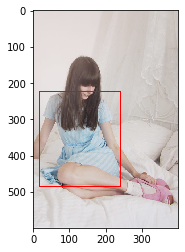

In [26]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [0]:
images = result[1:10]

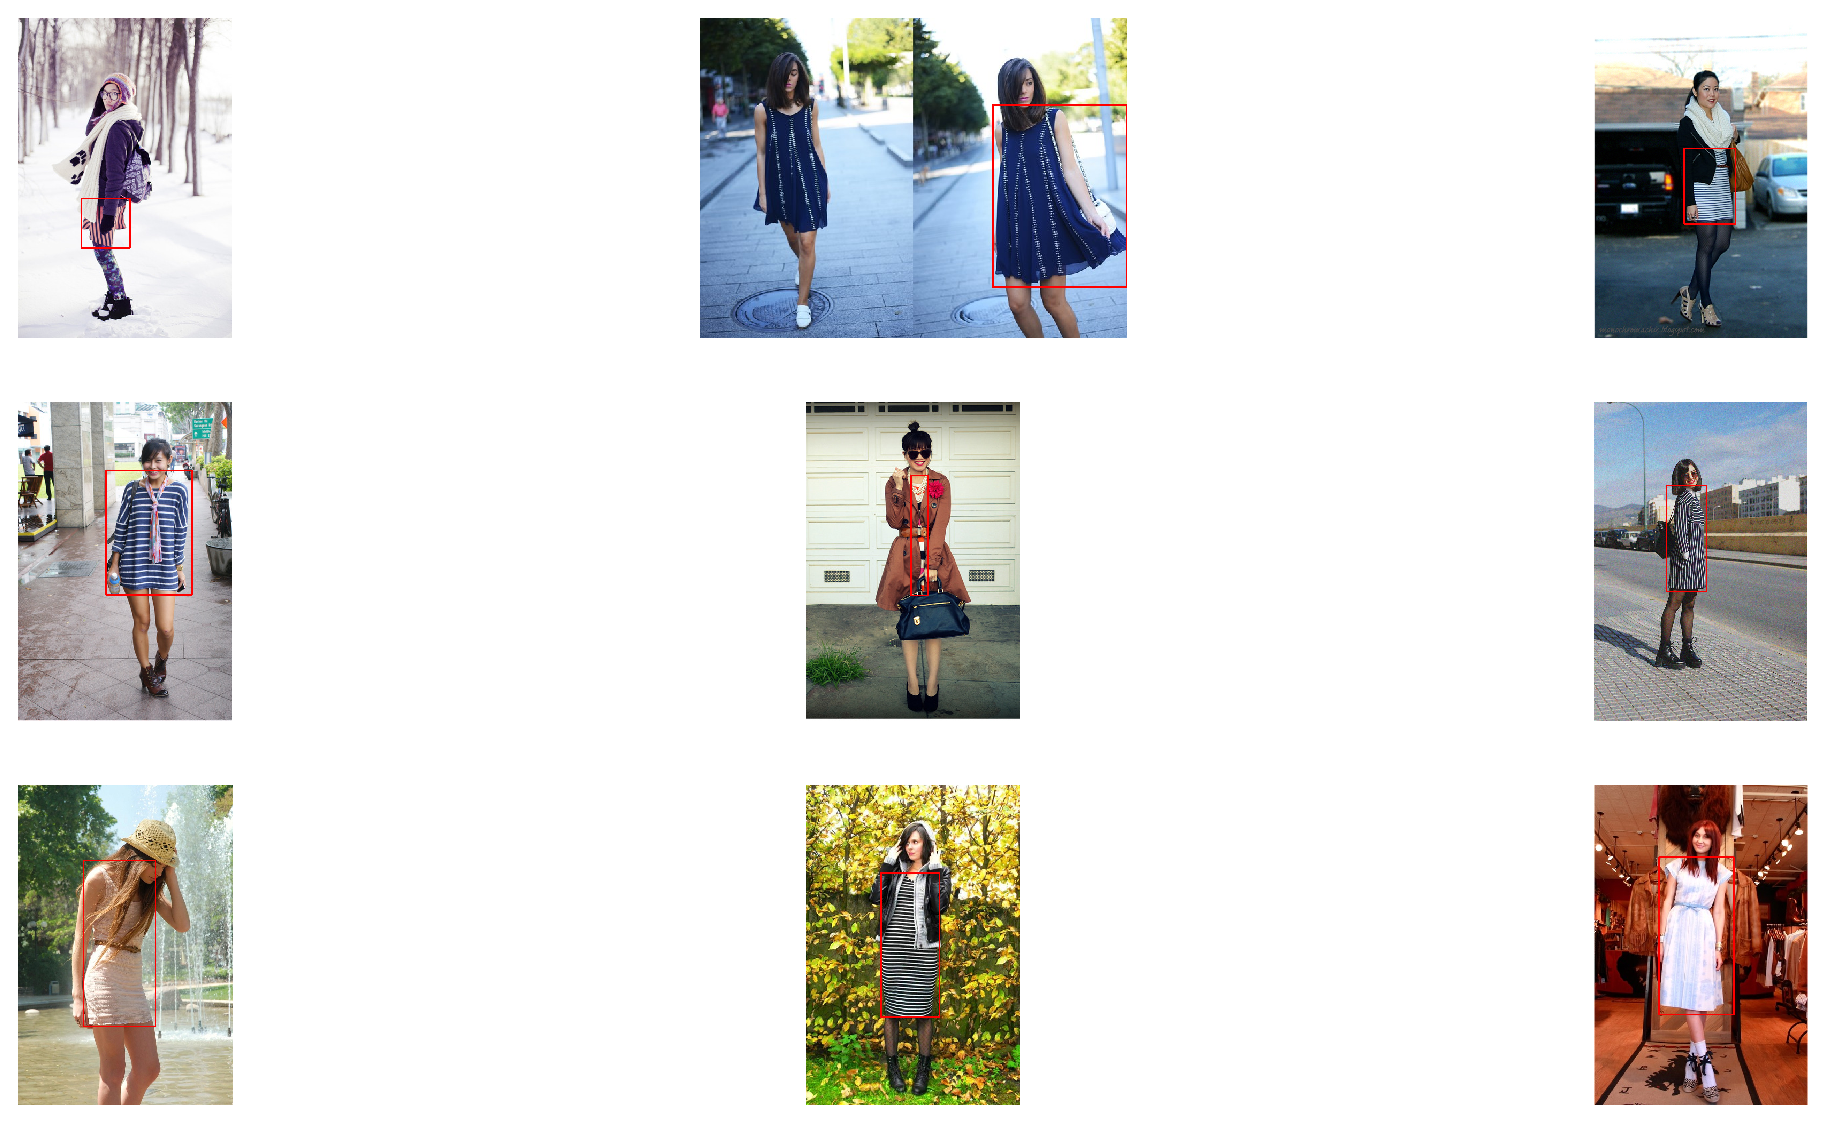

In [28]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 8), dpi=180, facecolor='w', edgecolor='k')
for i, image in enumerate(images, start=1):
    image_array = cv2.imread(image)
    
    image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
    plt.subplot(330+i)
    plt.axis('off')
    plt.imshow(image_array, cmap=plt.get_cmap('gray'))

plt.show()

## Sucessfully completed the machine learning assignment 